In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Veri setini yükleme
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veriyi normalize etme
X_train, X_test = X_train / 255.0, X_test / 255.0

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

# Basit CNN modeli
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),  # Conv2D'den sonra
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Conv2D'den sonra
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Conv2D'den sonra
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
history = model.fit(
    X_train, y_train, 
    epochs=200, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)

c:\Users\Alperen Arda\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.4080 - loss: 1.7003 - val_accuracy: 0.5216 - val_loss: 1.3071
Epoch 2/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6157 - loss: 1.1023 - val_accuracy: 0.6650 - val_loss: 0.9515
Epoch 3/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6726 - loss: 0.9413 - val_accuracy: 0.6489 - val_loss: 1.0101
Epoch 4/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7104 - loss: 0.8372 - val_accuracy: 0.6827 - val_loss: 0.9068
Epoch 5/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7383 - loss: 0.7630 - val_accuracy: 0.6924 - val_loss: 0.9074
Epoch 6/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7531 - loss: 0.7138 - val_accuracy: 0.6725 - val_loss: 0.9620
Epoch 7/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7722 - loss: 0.6540 - val_accuracy: 0.7132 - val_loss: 0.8427
Epoch 8/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 

<Axes: >

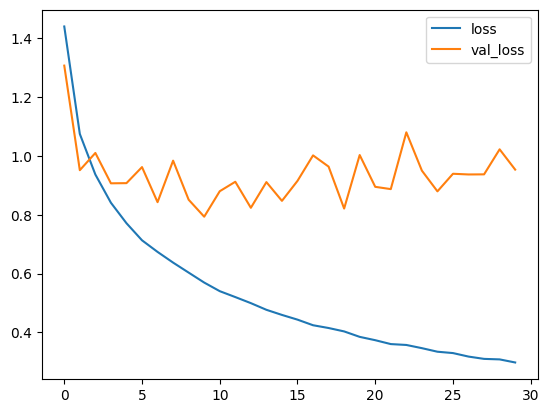

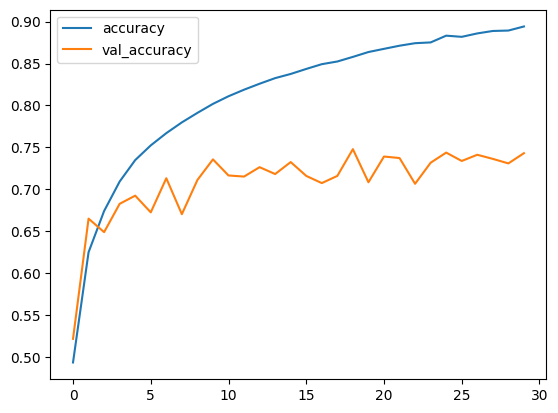

In [3]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

In [4]:
import cv2 as cv
import numpy as np

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

cap = cv.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Kameradan görüntü alınamadı. Çıkış yapılıyor...")
        break

    # Görüntüyü CIFAR-10 boyutuna dönüştürün ve normalleştirin
    img = cv.resize(frame, (32, 32))  # CIFAR-10 için 32x32 boyutuna küçültün
    img = img / 255.0  # Normalizasyon
    img = np.expand_dims(img, axis=0)  # 4D dizisine dönüştürün (batch size: 1)

    # Tahmin yapın
    predictions = model.predict(img)
    class_index = np.argmax(predictions[0])  # En yüksek olasılığa sahip sınıfı bulun
    class_label = classes[class_index]

    # Tahmini görüntü üzerine yazdırın
    cv.putText(frame, f'Tahmin: {class_label}', (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Görüntüyü gösterin
    cv.imshow('CIFAR-10 Classifier', frame)

    # 'q' tuşuna basıldığında döngüyü sonlandırın
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Kaynakları serbest bırakın
cap.release()
cv.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━